# California Housing Price

**Base de dados:** https://www.kaggle.com/datasets/camnugent/california-housing-prices

**Objetivo:** Verificar em qual bairro da Califórnia, um empresário do ramo imobiliário, deve construir residências para vender
              e obter o maior lucro considerando um investimento inicial fixo de ($ 200,000.00)

## Imports

In [64]:
import pandas  as pd
import numpy   as np
import seaborn as sns
                                                                        #| -> O cros_val_score cruza os dados e nos dá uma pespectiva
from sklearn.model_selection import train_test_split, cross_val_score   #| -> Separa os modelos de treino e de teste
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model  import LinearRegression                      # -> Ajusta um modelo de regressão linear simples
from sklearn.preprocessing import StandardScaler                        # -> Coloca os dados numa mesma escala para melhorar a eficiência da ML
from sklearn.metrics       import mean_squared_error                    # -> Média do erro ao quadrado
from sklearn.tree          import DecisionTreeRegressor                 # -> Árvores de decisão são um modelo de aprendizado de máquina supervisionado usado para problemas de classificação e regressão. Elas são uma forma de representar um conjunto de regras de decisão hierárquicas em forma de árvore.
from sklearn.ensemble      import RandomForestRegressor                 # -> É um modelo de aprendizado de máquina que se baseia em uma combinação de árvores de decisão, onde cada árvore é treinada em um subconjunto aleatório de dados e de atributos.
from sklearn.neighbors     import KNeighborsRegressor                   # -> Agrupa os dados por vizinhos mais próximos
from sklearn.svm           import SVR                                   # -> Encontra um hiperplano que separa os dados da melhor forma.

from matplotlib import pyplot as plt

## Data Loading

**Obs:** 
* households    = moradores
* median_income = renda média das famílias
* total_rooms   = total de cômodos (no dataset original está o total por bairro) 

In [2]:
# chamando o dataset e mostrando as primeiras linhas dos dados
data_raw = pd.read_csv("Coloque o seu caminho até o arquivo aqui", sep= ',')


## Showing the DataSet

In [3]:
data_raw.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# mostrando as informações a respeito do dataset

data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# mostrando as informações a respeito do dataset

data_raw.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Data Preparation

In [6]:
# Como o método info mostra, temos que trabalhar dados que não foram preenchidos na coluna total_bedrooms:
# Total de linhas do dataSet = 20640
# Total de linhas preenchidas na coluna total_bedrooms=20433

# A linha de código abaixo mastra as linhas que estão com valores nulos(NaN)
data_raw[data_raw['total_bedrooms'].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [7]:
# Preenchendo essa coluna com a média e o método 'fillna()', a média da coluna, obtém-se usando o método 'mean()' e seu valor é mostrado no 'describe()' também
# O 'info()' abaixo mostra que todos os dados nulos foram preenchidos

mean_TotalBedRooms = data_raw['total_bedrooms'].mean()

data_raw['total_bedrooms'].fillna(mean_TotalBedRooms, inplace=True)
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Grouping the datas

In [8]:
# A coluna 9 (ocean_proximity) é do tipo string é representada por 5 tipos diferentes de classificação

data_raw['ocean_proximity'].value_counts() # -> mostra as classificações dessa coluna

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
# Portanto, teremos que transformar esses dados agrupando por indíces para cada tipo:
# Esse método('factorize()') retorna dois arrays, o primeiro com o index de cada tipo de objeto e o segundo com o os dados de cada tipo de index

Id_Categoria, Categoria = data_raw['ocean_proximity'].factorize()
print(f'Array 1: {Id_Categoria}')

Array 1: [0 0 0 ... 2 2 2]


In [10]:
print(f'Array 2: {Categoria}')

Array 2: Index(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'], dtype='object')


## Change and add columns in the dataSet

In [11]:
# Fiz uma cópia da tabela e coloquei uma coluna passando os ID de categoria de 'ocean_proximity'

data1 = data_raw.copy()
data1['ocean_proximity_ID'] = Id_Categoria
data1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_ID
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0


In [12]:
# Nesse dataSet, outra coisa que não fazia sentido, era estar somado a quantidade total de quartos e de salas para cada bairro
# Então ajustou-se os dados para melhorar a vizualização, dividiu-se o total de salas e quartos pelo número de moradores.

data1['TotalRooms_Per_HouseHolds'] = data1['total_rooms'] / data1['households']
data1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_ID,TotalRooms_Per_HouseHolds
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,6.281853


In [13]:
data1['TotalBedRooms_Per_HouseHolds'] = data1['total_bedrooms'] / data1['households']
data1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_ID,TotalRooms_Per_HouseHolds,TotalBedRooms_Per_HouseHolds
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,6.984127,1.023810
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,6.238137,0.971880
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,8.288136,1.073446
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,5.817352,1.073059
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,6.281853,1.081081


## Deleting columns without valid information

In [14]:
# Deleta as colunas que foram transformadas, aquelas que não agregavam informações, são elas:

del(data1['total_rooms'], data1['total_bedrooms'])

In [15]:
data1.head()

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_ID,TotalRooms_Per_HouseHolds,TotalBedRooms_Per_HouseHolds
0,-122.23,37.88,41.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,6.984127,1.023810
1,-122.22,37.86,21.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,6.238137,0.971880
2,-122.24,37.85,52.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,8.288136,1.073446
3,-122.25,37.85,52.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,5.817352,1.073059
4,-122.25,37.85,52.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,6.281853,1.081081


## Plotting the graphs

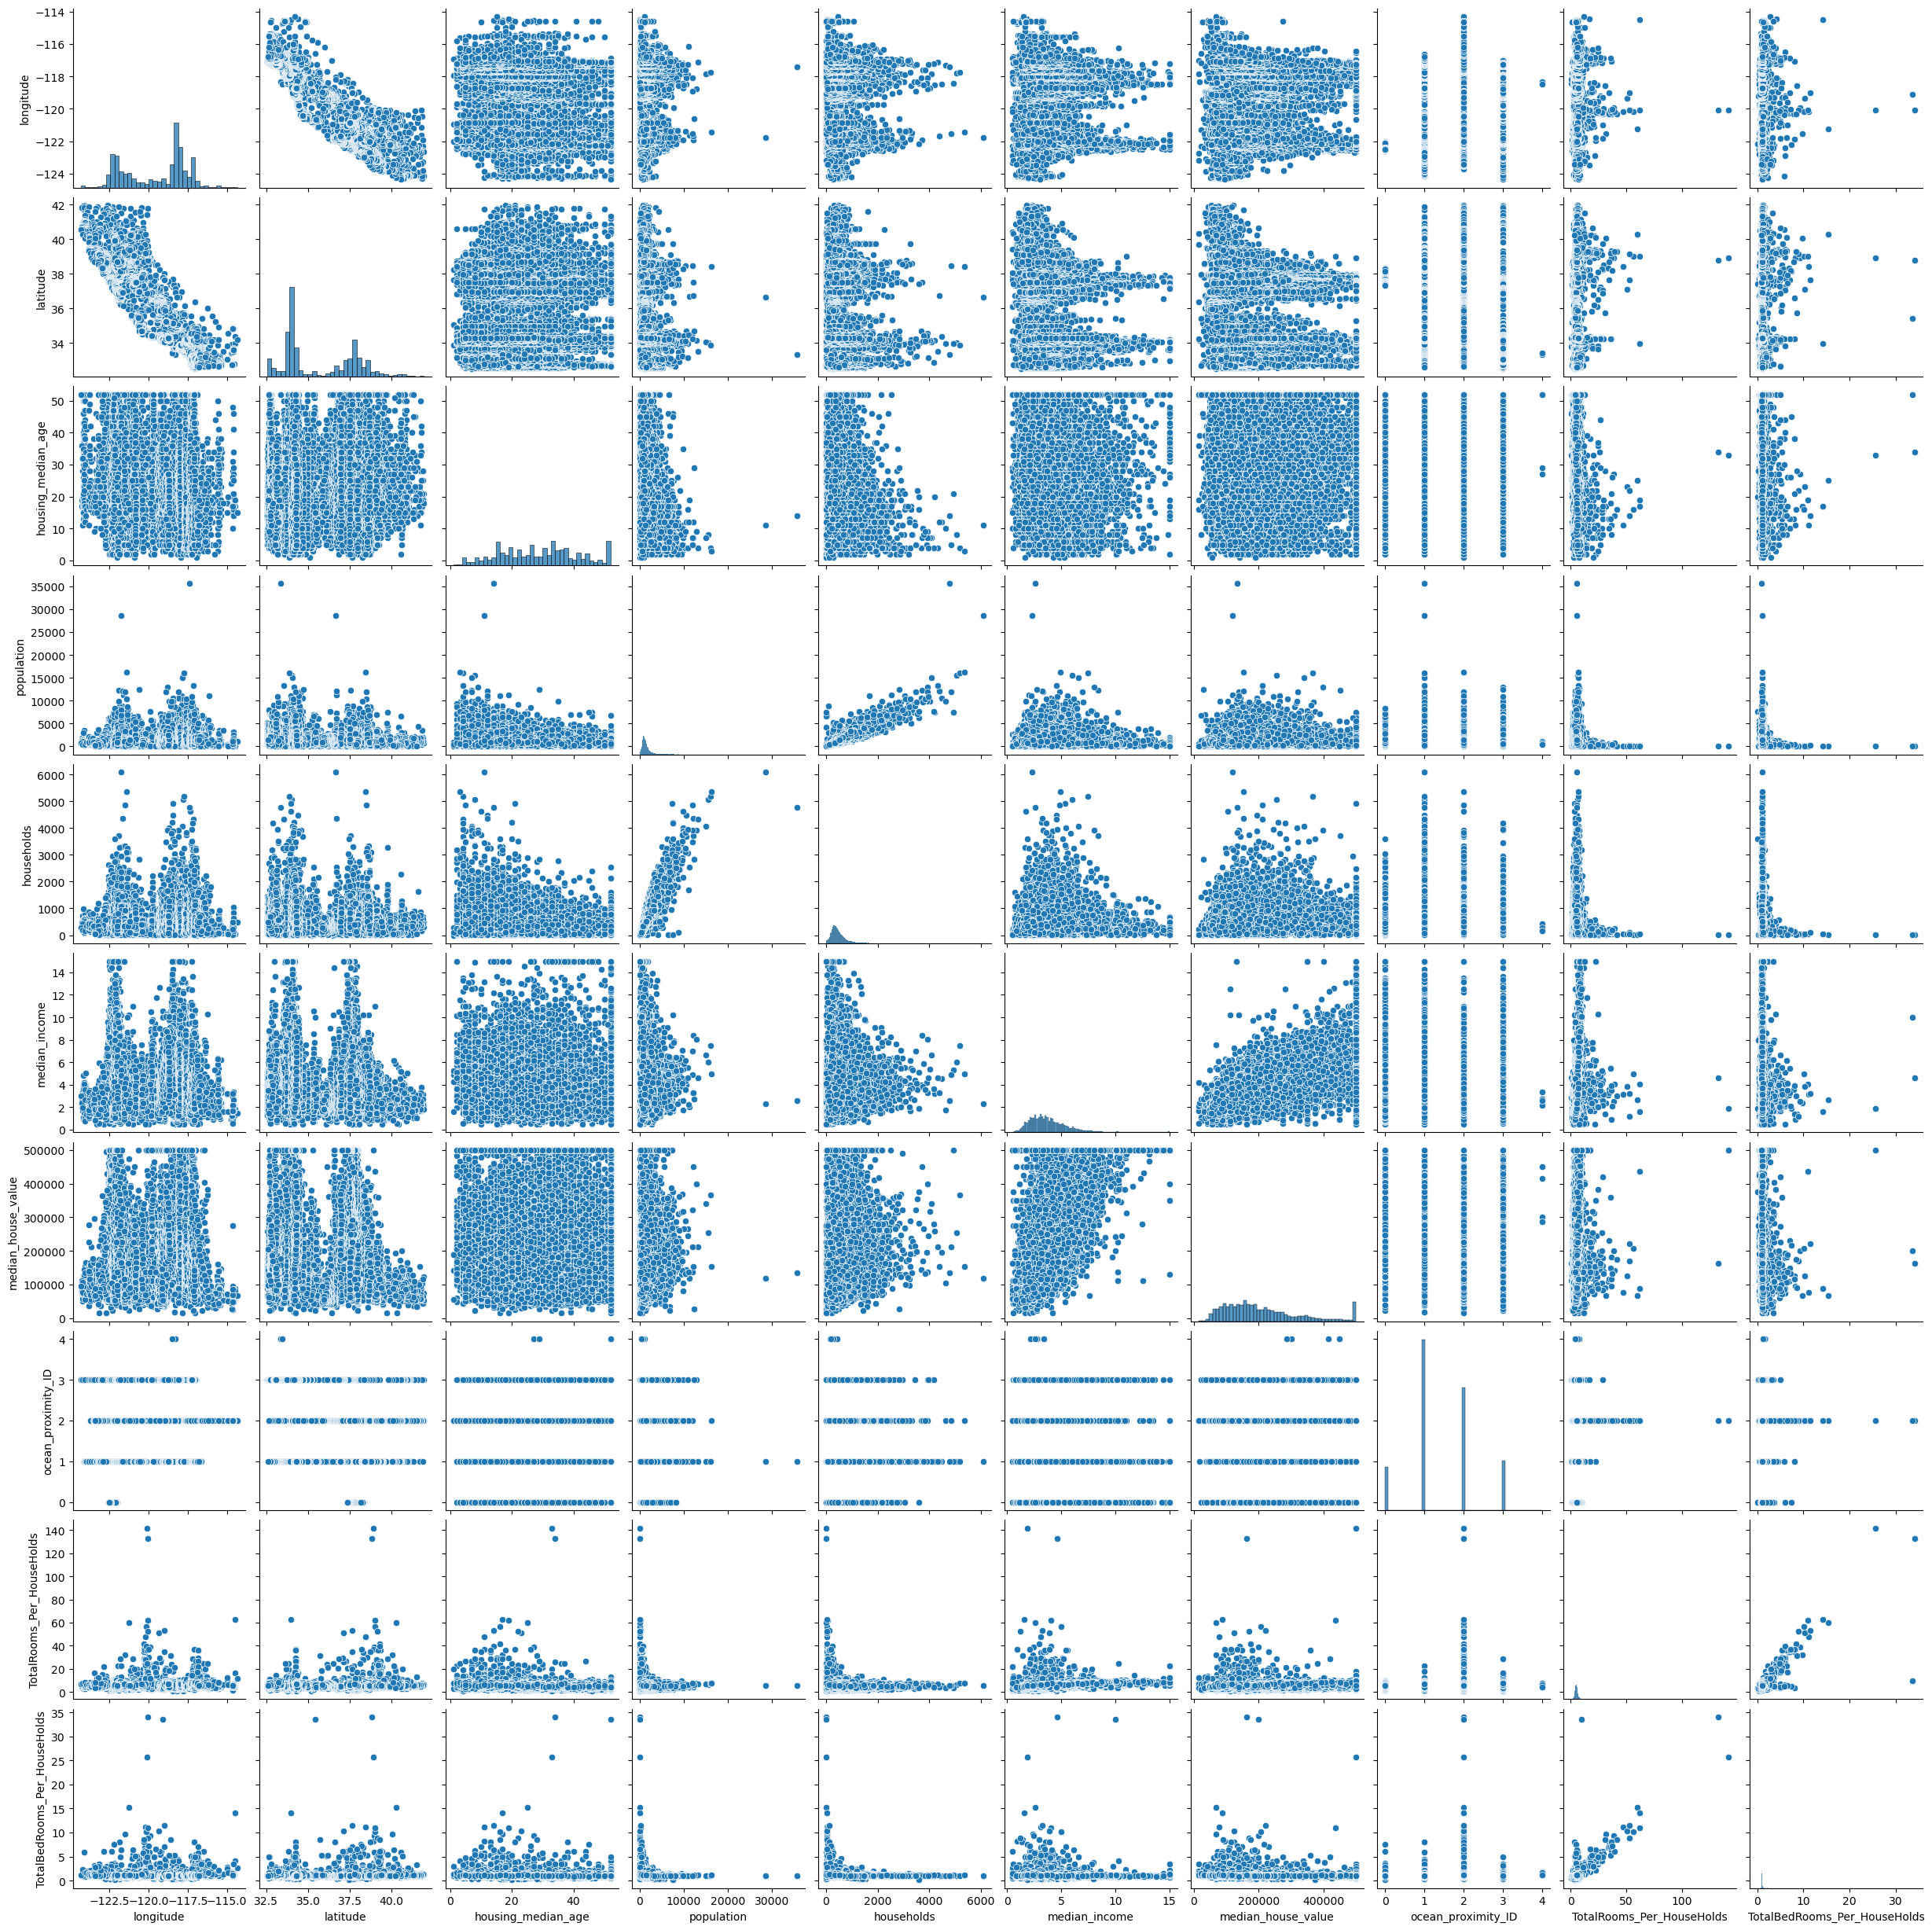

In [16]:
# Plota todas a variáveis independentes por pares

sns.pairplot(data1)

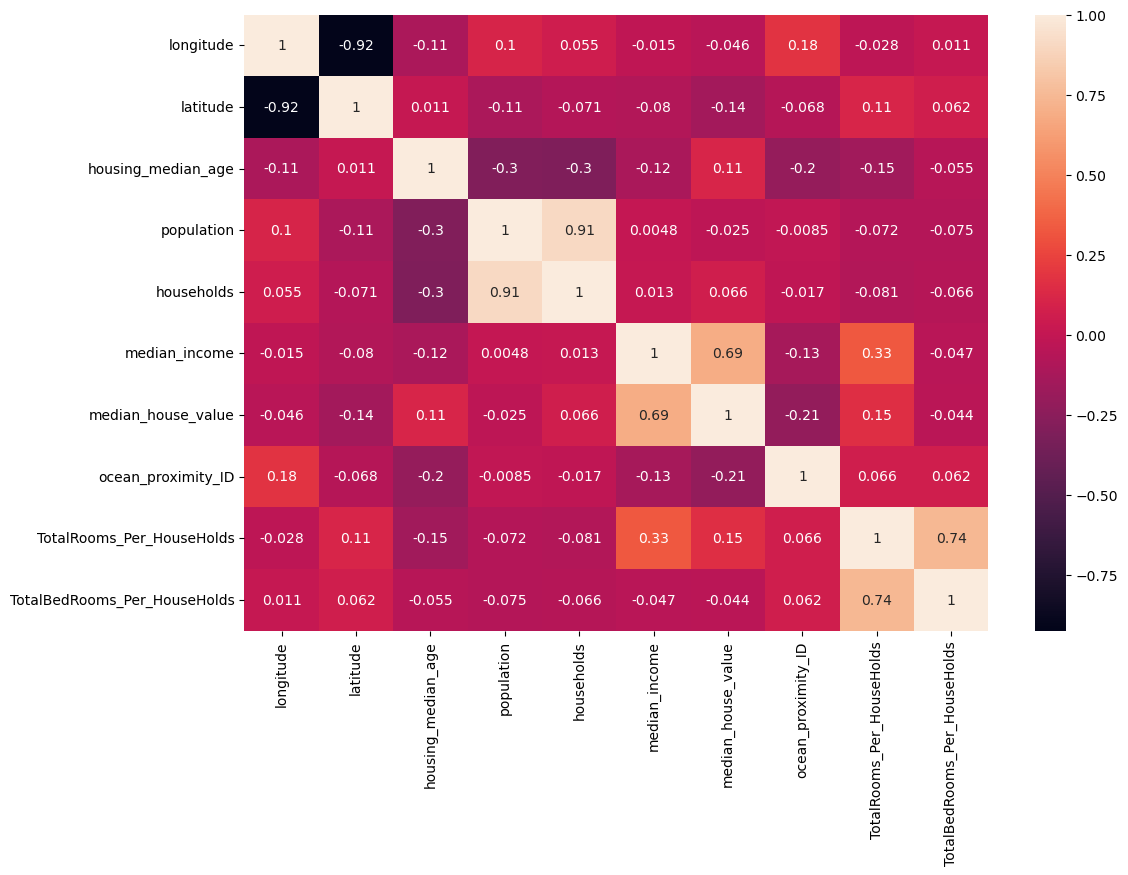

In [17]:
# Plota o mapa de calor de variáveis que se correlacionam

plt.figure(figsize=(12,8))
heatmap = sns.heatmap(data1.corr(), annot=True)
plt.show(heatmap)

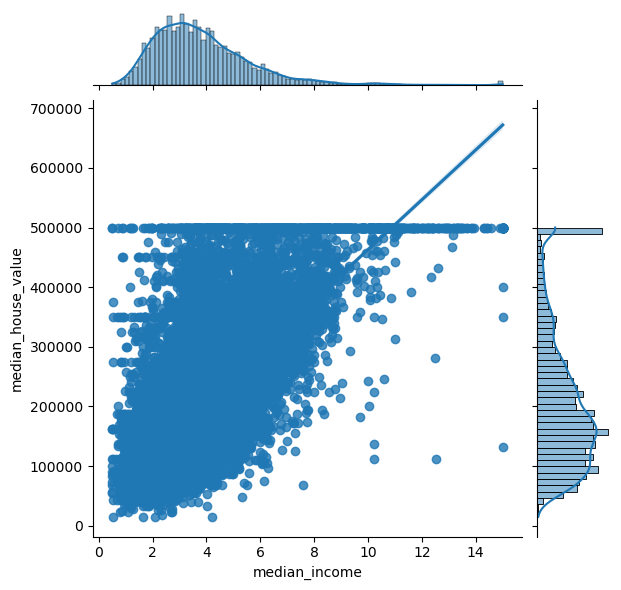

In [18]:
# plotando os dados isolados para ver a relação entre eles;
# o parâmetro kind aqui escolhe o tipo de gráfico que será exibido,
# o comando 'reg' é um modelo de regressão linear entre duas variáveis.

joinPlot = sns.jointplot(data=data1, y='median_house_value', x= 'median_income', kind='reg')
plt.show(joinPlot)

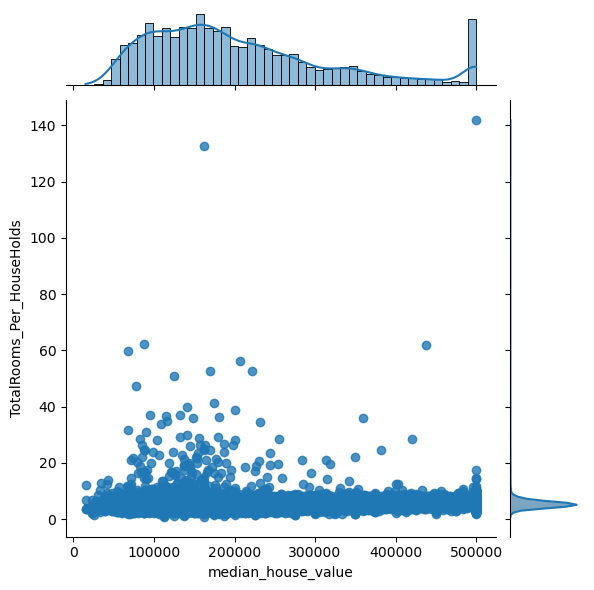

In [19]:
# plotando o gráfico abaixo, percebe-se possíveis outliers com a quantidade de cômodos por casa

joinPlot2 = sns.jointplot(data=data1, x= 'median_house_value', y= 'TotalRooms_Per_HouseHolds', kind='reg')
plt.show(joinPlot2)

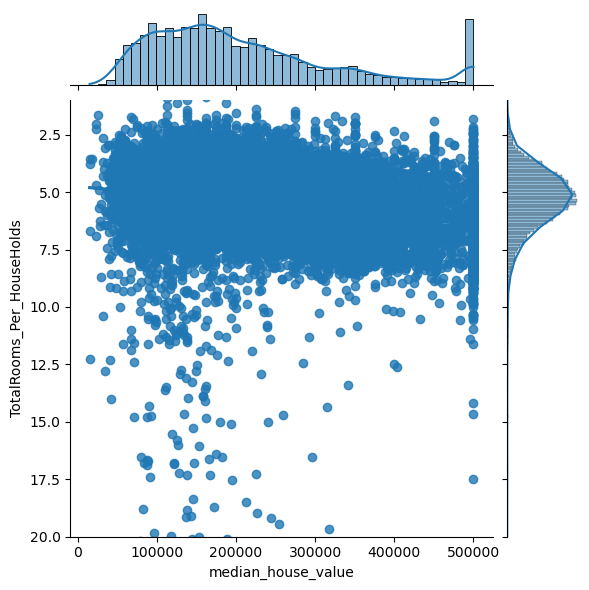

In [20]:
# Como mostra acima, existem um total de cômodos muito exagerado, e os dados se concentram abaixo dos 20 cômodos por casa,
# Portanto, vamos somente plotar o gráfico com no máximo 20 cômodos por família:

joinPlot3 = sns.jointplot(data=data1 , x= 'median_house_value', y= 'TotalRooms_Per_HouseHolds', kind= 'reg', ylim=20)
plt.show(joinPlot3)

### Deduzimos acima que, não é relevante a quantidade de cômodos pelo preço das casas
* Porque há casas perto do 100 e 200 mil com 20 cômodos

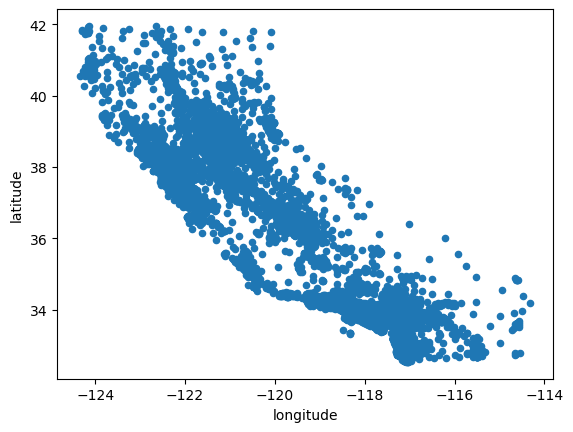

In [21]:
# plotando um gráfico de dados de disperção(scatter) que mostra o mapa da califórnia através da longitude e latitude
mapaCalifornia = data1.plot(kind='scatter', x='longitude', y='latitude')
plt.show(mapaCalifornia)

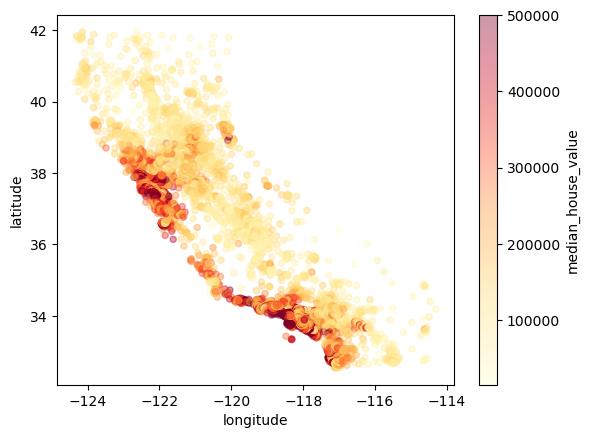

In [22]:
# Arrumando a coloração dos dados, para deixar as maiores concentrações visíveis
mapaCalifornia1 = data1.plot(kind='scatter', x='longitude', y='latitude', alpha= 0.4, c='median_house_value', cmap=plt.get_cmap('YlOrRd'))
plt.show(mapaCalifornia1)

   ### Acima, se você pegar o mapa da Califórnia, verá que, as maiores concentrações por média de preço, estão nas maiores e mais famosas cidades, tal como Los Angeles.

## Removing Outliers

In [23]:
# Aqui mostra quantos dados outliers, no caso são o total de cômodos acima de 20, estão no dataset e podem atrapalhar a análise 

data1[data1['TotalRooms_Per_HouseHolds'] > 20].shape

(69, 11)

In [24]:
# Retirando os dados outiliers (ruídos) do total de cômodos por casa

data1.drop(data1[data1['TotalRooms_Per_HouseHolds'] > 20].index.to_list(), axis=0, inplace=True)

In [25]:
# Aqui eu mostro que retirou as 69 linhas outliers
data1.shape

(20571, 11)

In [26]:
# Retirando-se os dados que não serão benéficos para o eixo X:
X = data1.drop(['median_house_value', 'ocean_proximity'], axis=1)
X

,longitude,latitude,housing_median_age,population,households,median_income,ocean_proximity_ID,TotalRooms_Per_HouseHolds,TotalBedRooms_Per_HouseHolds
0,-122.23,37.88,41.0,322.0,126.0,8.3252,0,6.984127,1.023810
1,-122.22,37.86,21.0,2401.0,1138.0,8.3014,0,6.238137,0.971880
2,-122.24,37.85,52.0,496.0,177.0,7.2574,0,8.288136,1.073446
3,-122.25,37.85,52.0,558.0,219.0,5.6431,0,5.817352,1.073059
4,-122.25,37.85,52.0,565.0,259.0,3.8462,0,6.281853,1.081081
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,845.0,330.0,1.5603,2,5.045455,1.133333
20636,-121.21,39.49,18.0,356.0,114.0,2.5568,2,6.114035,1.315789
20637,-121.22,39.43,17.0,1007.0,433.0,1.7000,2,5.205543,1.120092
20638,-121.32,39.43,18.0,741.0,349.0,1.8672,2,5.329513,1.171920


In [27]:
# Colocando a média dos valores das casas no eixo Y:
Y = data1['median_house_value']
Y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20571, dtype: float64

In [28]:
# Aqui declaro todas as variáveis de treino e teste, e o módulo abaixo nos separa os valores automaticamente para cada tipo:
# Essa função vem do sklearn.linear_model, e tem como argumentos o x e y que declaramos acima.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

## Scaling the datas

In [29]:
# coloca todos os dados de todas as colunas numa mesma escala como é mostrado abaixo:
sc = StandardScaler()

# Porém esse método transforma os dados em lista, temos que mudar novamente para DataFrame:
X_train = sc.fit_transform(X_train)

# Transformando os dados:
X_train = pd.DataFrame(X_train, columns = X.columns)     

# Fazendo o mesmo para X_test?
X_test = sc.fit_transform(X_test)
X_test = pd.DataFrame(X_test, columns = X.columns)

-------------------------------
##  Linear Regression:
### Score: 0.65 ou 65% ; RMSE(Desvio Padrão): 68,700 mil ; Cross_Val_Score: 0.65 ou 65%
-------------------------------

## Metrics
### 1º Score (Pontuação):

In [30]:
# Definindo o modelo
train = LinearRegression()

# Treinando o modelo de 'Regressão linear':
train.fit(X_train, Y_train)

LinearRegression()

In [31]:
# Com esse comando abaixo eu faço a predição para os dados de teste:
pred = train.predict(X_test)
pred[:10]

array([109736.35854608, 178903.00910661, 266514.32418341, 287409.64713086,
       143671.59427378, 239499.06805957, 209546.36290172, 243219.82713185,
       220659.56257965,  -3182.74336897])

In [32]:
# Aqui eu chamo o Y_test para verificar se os valores de predição batem com os valores, e verificar se teve um bom desempenho:
Y_test[:10]

2547      70500.0
19467    163700.0
14960    181300.0
10758    500001.0
3316      93400.0
9934     194400.0
7437     168100.0
1013     204400.0
8097     157900.0
1868      87500.0
Name: median_house_value, dtype: float64

In [33]:
# Compara os valores que ele não conhece que vem do test e passa a precisão dos dados:
train.score(X_test, Y_test)

0.647518992777822

### 2º Root Mean Squared Error (Desvio Padrão):

In [34]:
# RMSE ---> Root Mean Square Error:
# o modelo está com o erro muito grande, já que a média dos preço das casas é 200 mil, 68 mil é uma predição muito ruim:
print(f'RMSE: {np.sqrt(mean_squared_error(Y_test, pred))}')

RMSE: 68703.36807755588


### 3º Cross Validation (Validação Cruzada):

In [35]:
# Terceiro teste de métrica do modelo de LR, validação cruzada:
cross = cross_val_score(train, X_test, Y_test, cv=10)
final = sum(cross) / len(cross) # média simples
final 

# CONCLUSÃO: talvez o modelo de regressão linear não seja o mais indicado para esses dados que temos aqui.
# Score: 0.65 ou 65% ; RMSE(desvio padrão): 68,700 mil; Cross_Val_Score: 65%

0.6475436484965846

## Testing more model of Machine Learning

Aqui eu testarei diversos modelos afim de ver o melhor para esse conjunto de dados, são eles:
* Linear Regression (Regressão Linear)
* Decision Trees (Árvores de Decisão)
* Random Forest (Florestats Aleatórias)
* KNN (k-Nearest Neighbors - Agrupamento por vizinhos mais próximos)
* SVM (Support Vector Machine - Maquina de Vetores de Suporte)



------------------------------------------------
## Testing Decision Trees:
### Score: 0.68 ou 68% ; RMSE(Desvio Padrão): 66,313 mil; Cross_Val_Score: 0.76 ou 76%
------------------------------------------------

## Metrics
### 1º Score (Pontuação):

In [36]:
# Definindo o modelo:
params = [
    {
        'criterion':['squared_error','absolute_error'],
        'max_depth':[None,2,4,8,15]
    }
]
train = DecisionTreeRegressor()
grid_search = GridSearchCV(train, params, cv=10)
grid_search.fit(X_train, Y_train)
grid_search.best_params_

# Com essas funções conseguimos encontrar qual é a profundidade ideal dos nós na árvore, que no caso é "8"

{'criterion': 'squared_error', 'max_depth': 8}

In [37]:
# Continuando o código agora, treinaremos o modelo e faremos uma predição(previsão) usando o max_dept = 8 dentro de DecisionTreeRegressor

train = DecisionTreeRegressor(max_depth=8)
train.fit(X_train,Y_train)
pred = train.predict(X_test)
train.score(X_test, Y_test)   # Vê a pontuação que fazemos que no caso é 0.67 ou 67%

0.671926001848252

### 2º Root Mean Squared Error (Desvio Padrão):

In [38]:
#Desvio padrão ou RMSE(Root Mean Squared Error):
print(f'RMSE: {np.sqrt(mean_squared_error(Y_test, pred))}') # O RMSE é então 66,313 mil

RMSE: 66282.07158611313


### 3º Cross Validation (Validação Cruzada):

In [42]:
# Validação Cruzada:
cross = cross_val_score(train, X_test, Y_test, cv=10)
final = sum(cross) / len(cross) # média simples
final

# Score: 0.68 ou 68% ; RMSE(desvio padrão): 66,313 mil; Cross_Val_Score: 0.76 ou 76%
# De modo geral foi melhor do que o Linear Regression.

0.7587165104547895

------------------------------------------------
## Testing Random Forest

### Score: 0.78% ou 78% ; RMSE(Desvio Padrão):  54,655 mil ; Cross_Val_Score: 0.76 ou 76% 
------------------------------------------------

## Metrics
### 1º Score (Pontuação):

In [43]:
# Pegando o melhor parâmetro com o grid_search para aplicar abaixo no RandomForestRegressor
params = [
    {
        'criterion': ['squared_error','absolute_error'],
        'max_depth': [None,2,4,8]
    }
]
train = RandomForestRegressor()
grid_search = GridSearchCV(train, params, cv=10)
grid_search.fit(X_train, Y_train)
grid_search.best_params_

{'criterion': 'absolute_error', 'max_depth': None}

In [48]:
# Com o teste com os melhores parâmetros, chegamos numa pontuação de 77% de acertividade, é um bom resultado, o melhor até agora,
# ... mas temos que continuar com os outros testes para definir realmente qual o melhor modelo.

train = RandomForestRegressor(max_depth=None)
train.fit(X_train, Y_train)
pred = train.predict(X_test)
train.score(X_test, Y_test)

0.7769264579258855

### 2º Root Mean Squared Error (Desvio Padrão):

In [49]:
# Desvio padrão ou RMSE(Root Mean Squared Error):
print(f'RMSE= {np.sqrt(mean_squared_error(Y_test, pred))}')

# Esse segundo teste de métrica é o melhor até agora tbm!!

RMSE: 54655.541248648005


### 3º Cross Validation (Validação Cruzada):

In [50]:
# Validação Cruzada:
cross = cross_val_score(train, X_test, Y_test, cv=10)
final = sum(cross) / len(cross) # média simples
final

# Score: 0.78 ou 78% ; RMSE(desvio padrão): 54,656 mil; Cross_Val_Score: 0.76 ou 76%
# De modo geral foi melhor do os outros dois modelos. Mesmo com o "Cross_Val_Score" igual o de "Decision Trees"

0.7595362814562753

------------------------------------------------
## Testing KNN (K_Niarest_NEIGHBORS)

### Score: 0,73 ou 73%  ; RMSE(Desvio Padrão):  59,872 mil ; Cross_Val_Score: 0.69 ou 69%
------------------------------------------------

## Metrics
### 1º Score (Pontuação):

In [59]:
# Pegando o melhor parâmetro com o grid_search para aplicar abaixo no KNN
params = [
    {
            "weights":['uniform', 'distance'],
            "n_neighbors": [2,5,10,15,20,30]
    }
]
train = KNeighborsRegressor()
grid_search = GridSearchCV(train, params, cv=5)
grid_search.fit(X_train, Y_train)
grid_search.best_params_

{'n_neighbors': 10, 'weights': 'distance'}

In [60]:
train = KNeighborsRegressor(n_neighbors=10, weights='distance')
train.fit(X_train,Y_train)
pred = train.predict(X_test)
train.score(X_test,Y_test)

# Esse valor é bom, mas o de "Random Forest Regressor" é melhor.

0.7323068459632465

### 2º Root Mean Squared Error (Desvio Padrão):

In [61]:
# Desvio padrão ou RMSE(Root Mean Squared Error):
print(f'RMSE = {np.sqrt(mean_squared_error(Y_test, pred))}')

# Aqui podemos perceber que é um bom valor, porém é mais alto do que o de modelo de "árvores aleatórias".

RMSE = 59872.6940394


### 3º Cross Validation (Validação Cruzada):

In [62]:
# Validação Cruzada:
cross = cross_val_score(train, X_test, Y_test, cv=10)
final = sum(cross) / len(cross) # média simples
final

# Score: 0.73 ou 73% ; RMSE(desvio padrão): 59,872 mil; Cross_Val_Score: 0.69 ou 69%
# Ficou com todas as métricas piores do que o de "Random Forest Regressor"

0.68554081420444

------------------------------------------------
## Testing SVM (SUPPORT VECTOR MACHINE)

### Score: 0.008 ou 0.8% ; RMSE(Desvio Padrão): 115,250 mil  ; Cross_Val_Score:  
------------------------------------------------

## Metrics
### 1º Score (Pontuação):

In [66]:
# Pegando o melhor parâmetro com o grid_search para aplicar abaixo no SVR
params = [
    {
            'C':[0.1,1,10],
            'gamma':[0.1,1,10]
    }
]

train = SVR()
grid_search = GridSearchCV(train, params, cv=10)
grid_search.fit(X_train, Y_train)
grid_search.best_params_

{'C': 10, 'gamma': 0.1}

In [67]:
train = SVR(C=10, gamma=0.1)
train.fit(X_train, Y_train)
pred = train.predict(X_test)
train.score(X_test, Y_test)

# Foi o pior resultado até agora!

0.008109297579531272

### 2º Root Mean Squared Error (Desvio Padrão):

In [68]:
# Desvio padrão ou RMSE(Root Mean Squared Error):
print(f'RMSE = {np.sqrt(mean_squared_error(Y_test, pred))}')

# Podemos perceber que deu um valor muito alto, então é o pior resultado também para o "Desvio Padrão"

RMSE = 115250.30343469774


### 3º Cross Validation (Validação Cruzada):

In [69]:
# Validação Cruzada:
cross = cross_val_score(train, X_test, Y_test, cv=10)
final = sum(cross) / len(cross) # média simples
final

# Um valor negativo em validação cruzada, indica que o modelo está tendo um desempenho muito ruim.
# Score: 0.008 ou 0.8% ; RMSE(desvio padrão): 115,250 mil; Cross_Val_Score: -0.041 ou 4.1%

# Resumindo esse foi o pior modelo de "Machine Learning" para esse "DataSet".

-0.04104218165948714

## Concluindo a Análise:

In [135]:
# Como o modelo de "árvores aleatórias" foi o mais eficaz, usaremos ele. Lembrando que o intuito aqui é achar o melhor preço médio,
# ...em qual bairro eu posso comprar um lote de 200 mil dólares na Califórnia e que a empresa lucraria mais.

train = RandomForestRegressor()
train.fit(X_train, Y_train)

RandomForestRegressor()

In [136]:
# Esse código me dá as colunas que tem no "DataFrame"(DF) X:
X.columns.to_list()

['longitude',
 'latitude',
 'housing_median_age',
 'population',
 'households',
 'median_income',
 'ocean_proximity_ID',
 'TotalRooms_Per_HouseHolds',
 'TotalBedRooms_Per_HouseHolds']

In [122]:
# Com o modelo treinado, vamos criar um DataSet real para passar os dados:
#data_real = pd.DataFrame([
#    ["-122.23","37.88","41.0","322.0","126.0","8.3252","0","6.984127","1.023810"] # Esses dados eu peguei na primeira linha do Data Frame X lá em cima!
#], columns=X.columns.to_list())    # Eu passei o parâmetro columns buscando as colunas de X mostrada acima.

In [123]:
# Mostrando aqui que temos outro DF criado:
data_real

,longitude,latitude,housing_median_age,population,households,median_income,ocean_proximity_ID,TotalRooms_Per_HouseHolds,TotalBedRooms_Per_HouseHolds
0,-122.23,37.88,41.0,322.0,126.0,8.3252,0,6.984127,1.023810


# As latitudes e longitudes usadas aqui estão descritas abaixo:
## Latitude          /        Longitude:
1. ### (34.03189201324196, -118.4809509311287)  = Bairro: Santa Monica (LosAngeles)
2. ### (37.80460723285145, -122.26022593057918) = Bairro: Oakland (San Francisco)
3. ### (32.72415557688671, -117.16881606102312) = Bairro: Little Italy (San Diego)

In [137]:
data_real = pd.DataFrame([
    ["-118.48","34.03","41.0","322.0","126.0","8.3252","0","6.984127","1.023810"], # Aqui porém, acessando o google maps, eu peguei as longitudes e latitudes e troquei nesses dados.
    ["-122.26","37.80","41.0","322.0","126.0","8.3252","0","6.984127","1.023810"], # Aqui eu peguei os mesmos dados e coloquei outro bairro só mudei a longitude e a latitude.
    ["-117.16","32.72","41.0","322.0","126.0","8.3252","0","6.984127","1.023810"], # Aqui eu peguei um bairro de outra cidade: San Diego!
    ["-116.78","33.91","20.0","322.0","150.0","10.3252","4","8.984127","4.023810"] # Dados de outro bairro, mas com parâmetros diferentes dos anteriores.
], columns= X.columns.to_list())
data_real
# Se você alterar os valores dos parâmetros o modela muda o resultado, pois as especificações dos bairros são diferentes.

,longitude,latitude,housing_median_age,population,households,median_income,ocean_proximity_ID,TotalRooms_Per_HouseHolds,TotalBedRooms_Per_HouseHolds
0,-118.48,34.03,41.0,322.0,126.0,8.3252,0,6.984127,1.023810
1,-122.26,37.80,41.0,322.0,126.0,8.3252,0,6.984127,1.023810
2,-117.16,32.72,41.0,322.0,126.0,8.3252,0,6.984127,1.023810
3,-116.78,33.91,20.0,322.0,150.0,10.3252,4,8.984127,4.023810


In [138]:
pred = train.predict(data_real) # Aqui no lugar do "X_test" eu coloquei o data frame que criamos para fazer a predição das localizações exatas que eu quero, para verificar os valores dos lotes para construção.

In [139]:
pred # A minha ideia aqui é que deu overfitting e o modelo não está conseguindo fazer uma predição correta com os valores passados

array([376977.41, 376977.41, 376977.41, 376977.41])

### Testando de outra forma:

In [142]:
""" Eu resolvi testar assim, porque pois a variação dos dados de cada coluna é bem maior.
    Então a predição vai dar vários resultados, o qual, eu posso pegar o melhor deles e verificar o local no mapa!
"""
data_real1 = pd.DataFrame(X)

,longitude,latitude,housing_median_age,population,households,median_income,ocean_proximity_ID,TotalRooms_Per_HouseHolds,TotalBedRooms_Per_HouseHolds
0,-122.23,37.88,41.0,322.0,126.0,8.3252,0,6.984127,1.023810
1,-122.22,37.86,21.0,2401.0,1138.0,8.3014,0,6.238137,0.971880
2,-122.24,37.85,52.0,496.0,177.0,7.2574,0,8.288136,1.073446
3,-122.25,37.85,52.0,558.0,219.0,5.6431,0,5.817352,1.073059
4,-122.25,37.85,52.0,565.0,259.0,3.8462,0,6.281853,1.081081
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,845.0,330.0,1.5603,2,5.045455,1.133333
20636,-121.21,39.49,18.0,356.0,114.0,2.5568,2,6.114035,1.315789
20637,-121.22,39.43,17.0,1007.0,433.0,1.7000,2,5.205543,1.120092
20638,-121.32,39.43,18.0,741.0,349.0,1.8672,2,5.329513,1.171920


In [151]:
# Aqui eu faço a predição no DataFrame que passei acima, ou seja, o X.
pred = train.predict(data_real1)

# Obter o índice do valor máximo
indice_max = pred.argmax()

# Obter o valor máximo e a linha correspondente no dataframe
valor_max = pred[indice_max]
linha_max = data_real1.iloc[indice_max]

In [152]:
valor_max # esse é o maior valor que a predição fez dos dados desse "DataSet".

453975.37

In [153]:
indice_max # esse é o índice do valor máximo da predição.

1988

In [161]:
linha_max # e essas são as especificações da linha

longitude                      -119.790000
latitude                         36.740000
housing_median_age               52.000000
population                      401.000000
households                       84.000000
median_income                     2.109400
ocean_proximity_ID                2.000000
TotalRooms_Per_HouseHolds         2.059524
TotalBedRooms_Per_HouseHolds      1.035714
Name: 2004, dtype: float64

### Verificando os dados acima, o melhor lugar pelo valor da predição é da cidade: "Fresno" próximo a região central. 

### Bairro: "GoldLeaf".

### Eu verifiquei jogando a longitude e a latitude encontrada, no google.